# Breast Cancer Classifier Model

## Introduction

Breast cancer remains one of the most common malignancies affecting women globally, significantly impacting their health and quality of life. The importance of early detection cannot be overstated, as it is crucial for effective treatment and enhancing patient survival rates.

The objective of this project is to develop a classification model that can accurately identify the presence of breast cancer in patients. 

This model utilizes the Breast Cancer Wisconsin dataset from de UC Irvine Maching Learning Repository and its dataset was obtained by analyzing the cell nuclei characteristics of 569 images obtained by Fine Needle Aspiration of the breast mass. Each of the images are classified (diagnosed) as being **Benign** or **Malignant**.

The dataset containts 596 variables with the following features:
- **Patient ID:** A unique identifier assigned to each patient.
- **Diagnosis:** M = malignant (cancerous), B = benign (non-cancerous)
- **Cell Features:** Numerical features describing the following cell properties:
    1) **radius** (mean of distances from center to points on the perimeter)
    2) **texture** (standard deviation of gray-scale values)
    3) **perimeter**
    4) **area**
    5) **smoothness** (local variation in radius lengths)
    6) **compactness** (perimeter^2 / area - 1.0)
    7) **concavity** (severity of concave portions of the contour)
    8) **concave points** (number of concave portions of the contour)
    9) **symmetry**
    10) **fractal dimension** ("coastline approximation" - 1)

To develop our model, we employed several machine learning algorithms, including: 
- Logistic Regression
- Decision Tree
- Random Forest

We also evaluated the performance of these models using Principal Component Analysis (PCA) to reduce the number of features. However, we found that while PCA decreased feature count and computational time, it adversely affected the accuracy of our models.

The effectiveness of each model was assessed based on the following metrics:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion matrix

Finally, after rigorous testing and evaluation, the Tree Classifier emerged as the most effective model for this project. This model provided the best balance between accuracy and computational efficiency, making it highly suitable for practical application in breast cancer detection.

## Code

The code is structured into the following sections: 
- **Importing libraries.** This section focuses on installing all necessary libraries and importing them into the environment.
- **Loading and cleaning data.** Here, the data is loaded into the program, and any necessary cleaning procedures are performed to ensure data integrity. 
- **Exploring data.** This section involves exploring the dataset to gain insights into its structure, distribution, and any potential patterns or correlations present.
- **Splitting training and testing sets.** In this step, the dataset is divided into separate training and testing sets to facilitate model training and evaluation.
- **Training and analising the model.** Here, the best machine model, Tree Clasifier is used and its performance is analyzed.

### Importing libraries

Firstly, we streamline the process by installing all necessary libraries at once. Instead of installing them one by one, we utilize a requirements.txt file that containt a list of libraries with their appropriate versions.

In [1]:
pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 KB 1.6 MB/s eta 0:00:001.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 1.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 2.8 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 KB 942.8 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 KB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.2
    Uninstalling pyparsing-3.1.2:
      Successfully uninstalled pyparsing-3.1.2
  Attempting uninstall: numpy
    Found existing install

Next, we import all the required libraries into our environment.

In [1]:
# Import Libraries
from ucimlrepo import fetch_ucirepo # To import the data set from UC Irvine Repository
import pandas as pd # To manipulated data frame
import seaborn as sns # To graph data
from sklearn.preprocessing import MinMaxScaler # To scale data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
import ipywidgets as widgets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### Loading and cleaning data

In this section, we load the dataset, convert it into a dataframe to facilitate manipulation and analysis, scale the data to ensure uniformity, eliminate any null values for data integrity, and appropriately convert variables into their suitable types.

In [2]:
# Load data set
data = fetch_ucirepo(id=17)

# Convert the data into dataframe
df = pd.DataFrame(data.data.features, columns=data.feature_names)
df['target'] = data.data.targets

# Check the 5 first rows
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


At a glance, all our variables are numeric and it's evident that there are different scales of values. This can pose a problem because, when building models, failing to scale the features may result in larger values dominating the learning process. For this reason, the data is scaled accordingly:

In [3]:
# Scaling data

# Separate the target (diagnosis) and features to scale only the features
target = df['target']
features = df.drop(columns=['target'])

# Scale data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Convert to a dataframe
df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Joint target and feutures
df_scaled['target'] = target
df_scaled.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,M
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,M
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,M
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,M
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,M


In [4]:
# Overall view of the data
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

After executing `df.info`, it is observed that there are no null values in any of the variables. Additionally, the target variable (variable to predict) is of type object, so it should be transformed into a numeric variable in order to properly implement prediction models.

In [5]:
# Binarizing the target variable: 1 for Malignant and 0 for Benign
df_scaled.target = [1 if each == "M" else 0 for each in df.target]

# Check if the conversion has done correctly
df_scaled['target'].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Exploring data

In this section, we assess the percentage of patients with Malignant and Benign tumors to determine if the dataset requires resampling or upsampling. Additionally, we visualize the data through graphs to identify potential patterns or correlations.

<Axes: xlabel='target', ylabel='percent'>

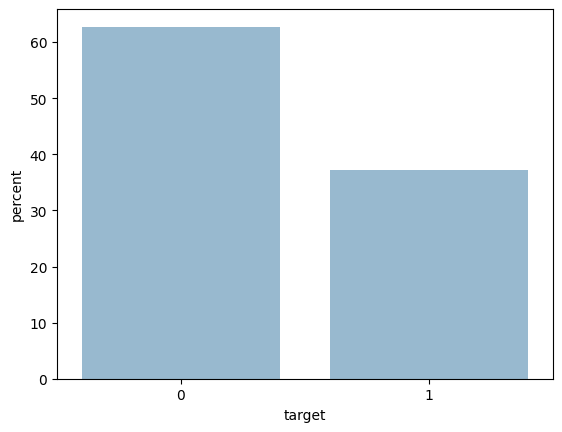

In [7]:
# Looking at the percentatge of patient with Malignant and Bening Tumors
sns.countplot(x='target', data=df_scaled, alpha=0.5, stat="percent")

Aproximaly, the 60% of the patients had Benign tumor while the rest of them had Malignant.

A 60/40 proportion for training the model is commonly used and considered appropriate in many machine learning applications. This proportion ensures that the model is trained on a diverse dataset while still providing a sufficient number of samples for each class. As such, it is not necessary to employ resampling techniques such as oversampling or undersampling to balance the classes. By using the 60/40 proportion, we can effectively train the model on representative data and achieve reliable performance without introducing additional complexity or potential biases.

<Axes: >

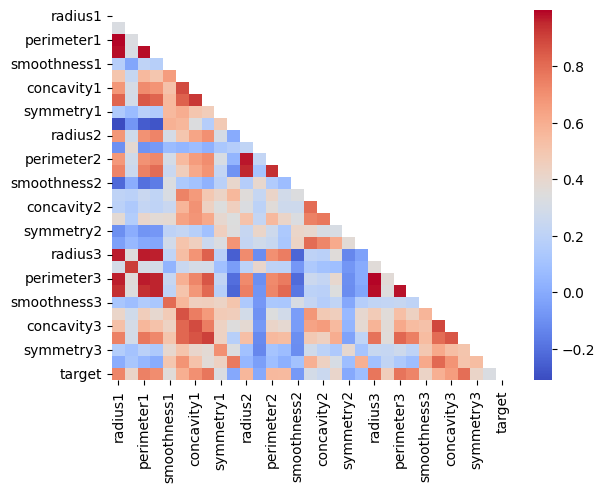

In [8]:
# To check if the features are correlated

# Calculate the correlation matrix
correlation_matrix = df_scaled.corr()

# Create a lower triangular mask
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap with the correlation matrix and the lower triangular mask
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm')

/home/elena/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


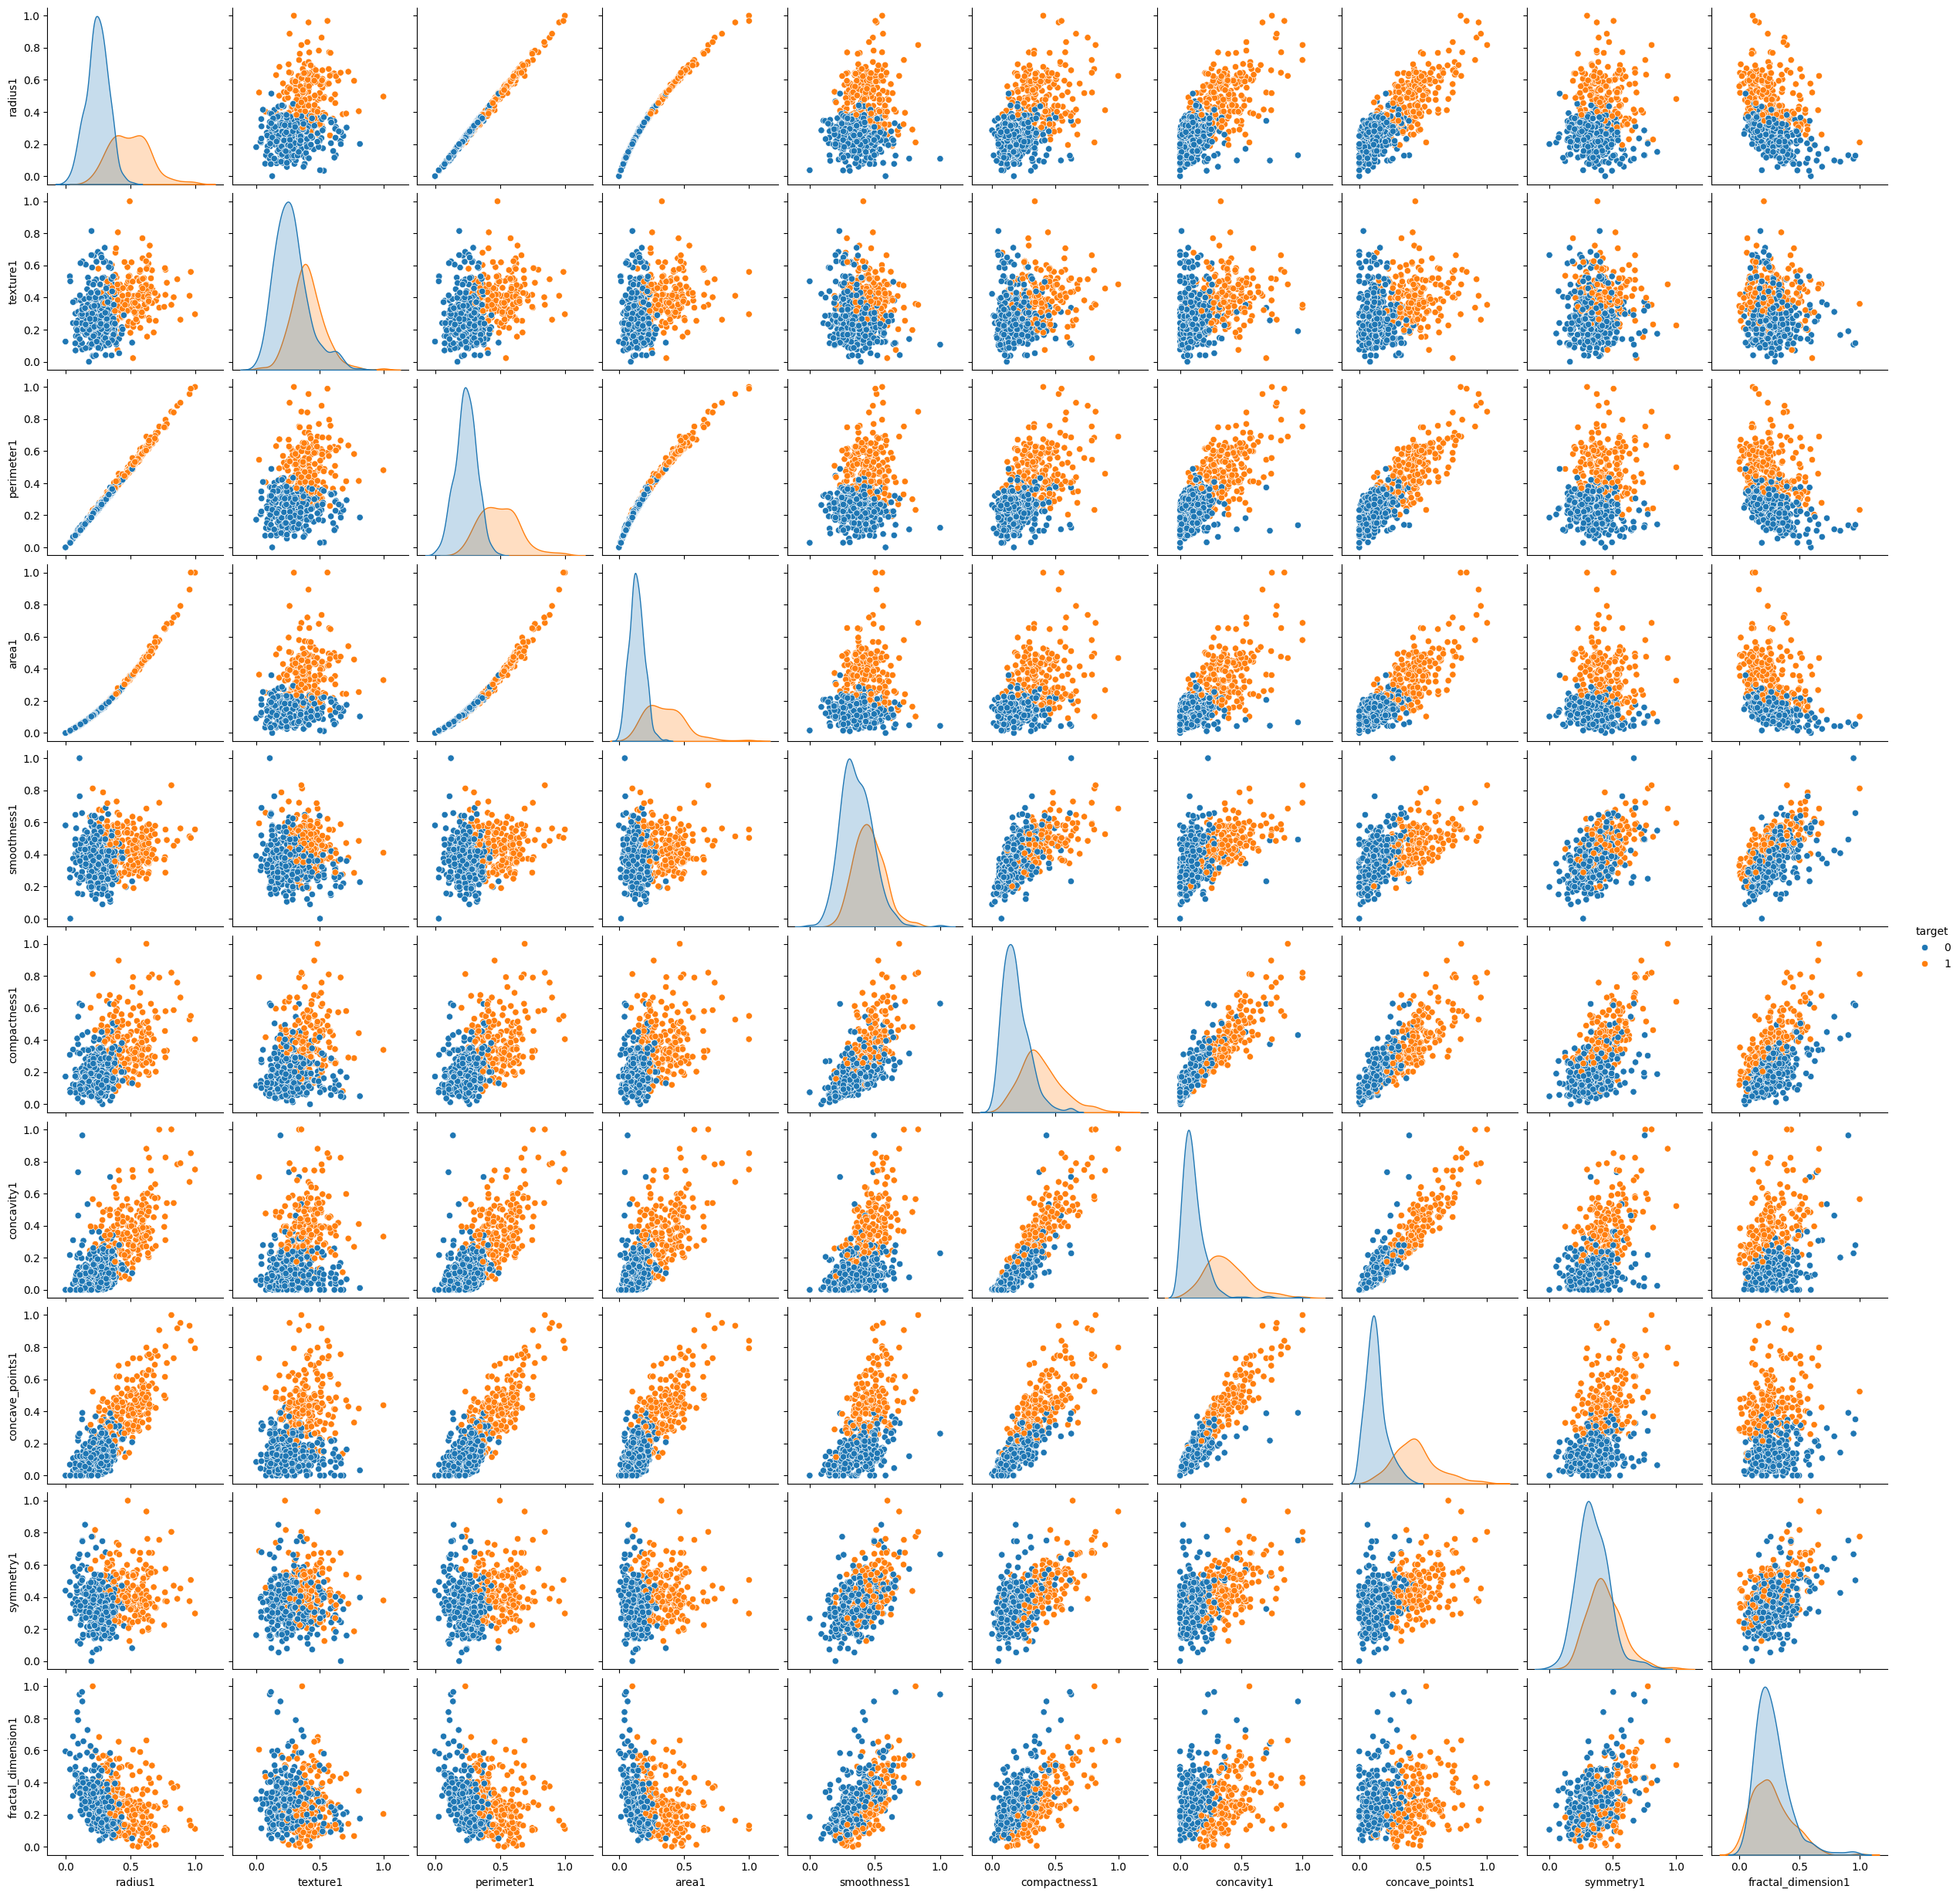

In [9]:
# Scartterplot for the first 10 variables
df_scatterplot = df_scaled.iloc[:, :10]
df_scatterplot['target'] = df_scaled['target']
sns.pairplot(df_scatterplot, hue='target')

From the last two graphs, it is observed that exists a high correlation between the radius, area and perimeter variables. Its correlation is due to the intrinsic nature of these variables, where the area and perimeter are derived from the radius.

In order to avoid multicollinearity in the model and simplify the interpretation of the results, it have been decided to remove the area and perimeter variables from the dataset.

In [10]:
# Remove perimeter and area variable
removed_columns = ['perimeter1','perimeter2','perimeter3','area1','area2','area3']
df_scaled = df_scaled.drop(columns=removed_columns)
df_scaled.columns

Index(['radius1', 'texture1', 'smoothness1', 'compactness1', 'concavity1',
       'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2',
       'texture2', 'smoothness2', 'compactness2', 'concavity2',
       'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3',
       'texture3', 'smoothness3', 'compactness3', 'concavity3',
       'concave_points3', 'symmetry3', 'fractal_dimension3', 'target'],
      dtype='object')

### Splitting training and testing sets

In this section, we determine the number of variables to use for PCA and split the dataset into training and testing sets.

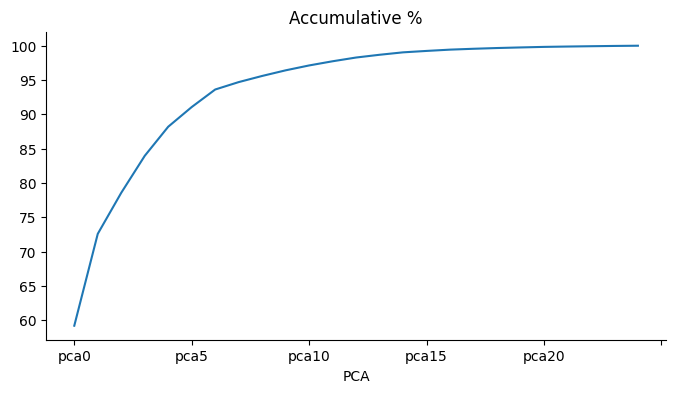

In [11]:
# PCA
n = 25
pca = PCA(n_components=n)
PP = pca.fit_transform(df_scaled)

df = pd.DataFrame()
index = pca.get_feature_names_out()
df['PCA'] = pca.get_feature_names_out()
df = df.set_index('PCA')
var = pca.explained_variance_ratio_
df['% of variance'] = var*100
cum = pca.explained_variance_ratio_.cumsum()
df['Accumulative %'] = cum*100
# df # to see Accumulative table

# Print Accumulative table and choose the best parameter
df['Accumulative %'].plot(kind='line', figsize=(8, 4), title='Accumulative %')
plt.gca().spines[['top', 'right']].set_visible(False)

A checkbox allows users to select whether to employ Principal Component Analysis (PCA) for model training. If PCA is chosen, a slider enables the adjustment of the number of components. The default slider value is set to 10, as previous analysis indicates that 10 components capture over 95% of the data variance, adhering to best practices. The checkbox is initially set to 0 (no PCA) since accuracy results show no improvement with PCA. This approach could be more beneficial with larger datasets. Plots such as Variables relevance or confucion matrix will be not available if use PCA

In [12]:
# add checkbox
Use_PCA = widgets.Checkbox(value=False, description='PCA')
display(Use_PCA)
# add slider
n = widgets.IntSlider(min=0, max=25, value=10)
display(n)


Checkbox(value=False, description='PCA')

IntSlider(value=10, max=25)

In [13]:
# Splitting data for training (80%) and testing (20%)
# Divide Train and test
X = df_scaled.drop("target", axis = 1)
y = df_scaled["target"].values

if Use_PCA.value==True:
  n = n.value # value from previous slider
  pca = PCA(n_components=n)
  pca.fit(X)
  X = pca.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 7,
                                shuffle = True)
print(X_train.shape)
print(X_test.shape)

(455, 24)
(114, 24)


### Training the model

#### Tree Classifier

In [19]:
# Tree Classifier
np.random.seed(42)
train_scores, test_scores = list(), list()
max_depths = [i for i in range(1,40)]
for i in max_depths:
    dtc = DecisionTreeClassifier(max_depth=i,random_state=6)
    dtc = dtc.fit(X_train, y_train)
    train_yhat = dtc.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    test_yhat = dtc.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    print('Max. depth: %.3f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

Max. depth: 1.000, train: 0.923, test: 0.921
Max. depth: 2.000, train: 0.963, test: 0.930
Max. depth: 3.000, train: 0.969, test: 0.939
Max. depth: 4.000, train: 0.987, test: 0.974
Max. depth: 5.000, train: 0.991, test: 0.974
Max. depth: 6.000, train: 0.996, test: 0.956
Max. depth: 7.000, train: 0.998, test: 0.982
Max. depth: 8.000, train: 1.000, test: 0.991
Max. depth: 9.000, train: 1.000, test: 0.991
Max. depth: 10.000, train: 1.000, test: 0.991
Max. depth: 11.000, train: 1.000, test: 0.991
Max. depth: 12.000, train: 1.000, test: 0.991
Max. depth: 13.000, train: 1.000, test: 0.991
Max. depth: 14.000, train: 1.000, test: 0.991
Max. depth: 15.000, train: 1.000, test: 0.991
Max. depth: 16.000, train: 1.000, test: 0.991
Max. depth: 17.000, train: 1.000, test: 0.991
Max. depth: 18.000, train: 1.000, test: 0.991
Max. depth: 19.000, train: 1.000, test: 0.991
Max. depth: 20.000, train: 1.000, test: 0.991
Max. depth: 21.000, train: 1.000, test: 0.991
Max. depth: 22.000, train: 1.000, test: 0.9

In [20]:
# prediction
prediction_test_dtc = dtc.predict(X_test)

# metrixs
print(classification_report(y_test, prediction_test_dtc, target_names=["benign", "malignant"]))

              precision    recall  f1-score   support

      benign       0.99      1.00      0.99        74
   malignant       1.00      0.97      0.99        40

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



The confusion matrix is a fundamental tool in evaluating classification models. It serves to visually display the relationship between a model's predictions and the true classes of the data. This matrix organizes the model's predictions into four categories:

- True Positives: Cases where the model correctly predicted an instance as positive (i.e., belonging to the positive class).
- True Negatives: Cases where the model correctly predicted an instance as negative (i.e., belonging to the negative class).
- False Positives: Cases where the model incorrectly predicted an instance as positive when it was actually negative.
- False Negatives: Cases where the model incorrectly predicted an instance as negative when it was actually positive.

<Figure size 600x400 with 0 Axes>

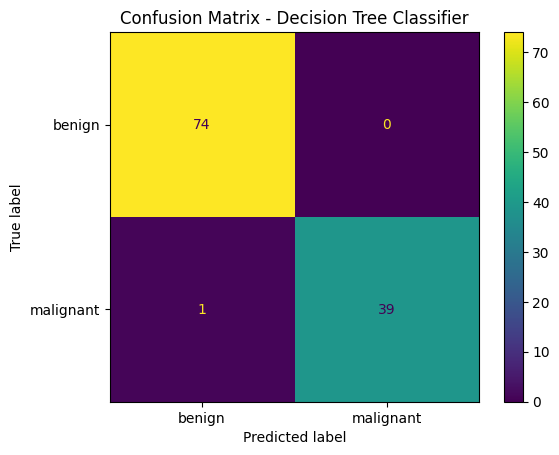

In [21]:
# Confusion Matrix of the tree classifier
fig = plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, prediction_test_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["benign", "malignant"])
disp.plot(cmap="viridis")
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()

We observe that the model successfully identifies the majority of both benign and malignant instances, with a very low number of false positives and false negatives. However, there is a single case where the model incorrectly classifies a benign instance as malignant. Overall, these results suggest that the classifier performs well in detecting both types of tumors.